[Reference](https://towardsdatascience.com/announcing-pycarets-new-time-series-module-b6e724d4636c)

In [1]:
pip install pycaret-ts-alpha

     |████████████████████████████████| 479 kB 7.2 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 6.1 MB 32.9 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 261 kB 78.8 MB/s 
     |████████████████████████████████| 16.9 MB 45 kB/s 
     |████████████████████████████████| 25.3 MB 69 kB/s 
     |████████████████████████████████| 1.7 MB 33.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4 MB 55.9 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 
     |████████████████████████████████| 113 kB 58.2 MB/s 
     |████████████████████████████████| 167 kB 61.3 MB/s 
     |████████████████████████████████| 1.3 MB 70.7 MB/s 
     |██████████████████████

# Loading Data

In [2]:
import pandas as pd
from pycaret.datasets import get_data
data = get_data('pycaret_downloads')
data['Date'] = pd.to_datetime(data['Date'])
data = data.groupby('Date').sum()
data = data.asfreq('D')
data.head()

Date  Total
0   7/8/2021   3773
1   7/9/2021   3172
2  7/10/2021   2079
3  7/11/2021   2725
4  7/12/2021   4542

Total
Date             
2021-07-08   3773
2021-07-09   3172
2021-07-10   2079
2021-07-11   2725
2021-07-12   4542

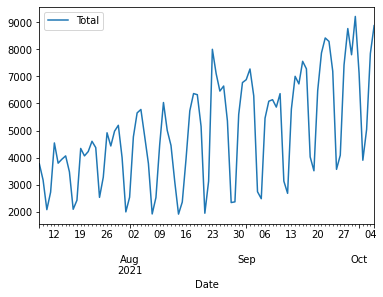

In [3]:
# plot the data
data.plot()

# Initialize Setup

In [4]:
# with functional API
from pycaret.time_series import *
setup(data, fh = 7, fold = 3, session_id = 123)

# with new object-oriented API
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
exp = TimeSeriesExperiment()
exp.setup(data, fh = 7, fold = 3, session_id = 123)

Description                    Value
0                    session_id                      123
1                 Original Data                  (90, 1)
2                Missing Values                    False
3         Transformed Train Set                    (83,)
4          Transformed Test Set                     (7,)
5                Fold Generator  ExpandingWindowSplitter
6                   Fold Number                        3
7   Enforce Prediction Interval                    False
8        Seasonal Period Tested                        7
9          Seasonality Detected                     True
10     Target Strictly Positive                     True
11           Target White Noise                       No
12                Recommended d                        1
13       Recommended Seasonal D                        1
14                     CPU Jobs                       -1
15                      Use GPU                    False
16               Log Experiment                    False
17              Experiment Name          ts-default-name
18                          USI                     39fc
19              Imputation Type                   simple

# Statistical Testing

In [5]:
check_stats()

Test   Test Name  ...                   Setting        Value
0        Summary  Statistics  ...                                     90
1        Summary  Statistics  ...                                4960.37
2        Summary  Statistics  ...                                 4776.5
3        Summary  Statistics  ...                                   1939
4        Summary  Statistics  ...                            3.75972e+06
5        Summary  Statistics  ...                              -0.920113
6        Summary  Statistics  ...                                0.22622
7        Summary  Statistics  ...                                     89
8    White Noise   Ljung-Box  ...  {'alpha': 0.05, 'K': 24}      293.089
9    White Noise   Ljung-Box  ...  {'alpha': 0.05, 'K': 48}      460.126
10   White Noise   Ljung-Box  ...  {'alpha': 0.05, 'K': 24}  4.11726e-48
11   White Noise   Ljung-Box  ...  {'alpha': 0.05, 'K': 48}  1.09758e-68
12   White Noise   Ljung-Box  ...  {'alpha': 0.05, 'K': 24}        False
13   White Noise   Ljung-Box  ...  {'alpha': 0.05, 'K': 48}        False
14  Stationarity         ADF  ...           {'alpha': 0.05}        False
15  Stationarity         ADF  ...           {'alpha': 0.05}     0.958371
16  Stationarity         ADF  ...           {'alpha': 0.05}  -0.00194418
17  Stationarity         ADF  ...           {'alpha': 0.05}     -3.51274
18  Stationarity         ADF  ...           {'alpha': 0.05}     -2.89749
19  Stationarity         ADF  ...           {'alpha': 0.05}     -2.58595
20  Stationarity        KPSS  ...           {'alpha': 0.05}         True
21  Stationarity        KPSS  ...           {'alpha': 0.05}          0.1
22  Stationarity        KPSS  ...           {'alpha': 0.05}    0.0329083
23  Stationarity        KPSS  ...           {'alpha': 0.05}        0.119
24  Stationarity        KPSS  ...           {'alpha': 0.05}        0.146
25  Stationarity        KPSS  ...           {'alpha': 0.05}        0.176
26  Stationarity        KPSS  ...           {'alpha': 0.05}        0.216
27     Normality     Shapiro  ...           {'alpha': 0.05}        False
28     Normality     Shapiro  ...           {'alpha': 0.05}    0.0179583

[29 rows x 5 columns]

# Exploratory Data Analysis

In [6]:
# functional API
plot_model(plot = 'ts')

# object-oriented API
exp.plot_model(plot = 'ts')

In [7]:
# cross-validation plot
plot_model(plot = 'cv')

In [8]:
# ACF plot
plot_model(plot = 'acf')

In [9]:
# Diagnostics plot
plot_model(plot = 'diagnostics')

In [10]:
# Decomposition plot
plot_model(plot = 'decomp_stl')

# Model Training and Selection

In [11]:
# functional API
best = compare_models()

# object-oriented API
best = exp.compare_models()

Model      MAE  \
auto_arima                                              Auto ARIMA  531.918   
arima                                                        ARIMA  568.497   
theta                                             Theta Forecaster  526.386   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending  607.773   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending  607.774   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending  607.773   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending  607.774   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...  607.773   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending  605.303   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...  622.354   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...  637.073   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending   633.58   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...  623.385   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...  649.424   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending  639.408   
exp_smooth                                   Exponential Smoothing  554.193   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...  685.786   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending  749.455   
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending  778.955   
snaive                                   Seasonal Naive Forecaster  758.619   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending   823.94   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   879.72   
naive                                             Naive Forecaster  1340.62   
polytrend                              Polynomial Trend Forecaster  1636.96   
grand_means                                 Grand Means Forecaster  2193.97   

                    RMSE    MAPE   SMAPE      R2  TT (Sec)  
auto_arima       626.211  0.0911  0.0916  0.8632    2.5633  
arima            687.251  0.0957  0.0975  0.8316    0.0367  
theta            672.942  0.0921  0.0988  0.8201    0.0200  
lr_cds_dt        752.876  0.0972  0.0995  0.8048    0.0233  
en_cds_dt        752.875  0.0972  0.0995  0.8048    0.0233  
ridge_cds_dt     752.876  0.0972  0.0995  0.8048    0.0233  
lasso_cds_dt     752.875  0.0972  0.0995  0.8048    0.0233  
lar_cds_dt       752.876  0.0972  0.0995  0.8048    0.0233  
rf_cds_dt        691.655  0.0963  0.0998  0.8354    0.6733  
llar_cds_dt      757.409  0.1005  0.1026  0.8035    0.0233  
omp_cds_dt       779.951  0.1038  0.1043   0.789    0.0233  
et_cds_dt        719.312  0.1022  0.1055  0.8235    0.6000  
lightgbm_cds_dt  713.959  0.1086  0.1073  0.8201    0.0300  
br_cds_dt        764.901  0.1061   0.108  0.7995    0.0233  
ada_cds_dt       729.451  0.1057  0.1081  0.8159    0.1033  
exp_smooth       638.494  0.1026  0.1091  0.8402    0.1167  
gbr_cds_dt       798.831  0.1099  0.1128   0.779    0.0567  
knn_cds_dt        857.95   0.124  0.1265  0.7476    0.4967  
dt_cds_dt        906.237  0.1244  0.1293    0.72    0.0267  
snaive           868.809  0.1273  0.1342  0.7328    0.0133  
huber_cds_dt     953.952   0.141  0.1475  0.6721    0.0533  
par_cds_dt       1070.64  0.1433  0.1478  0.5652    0.0233  
naive            1921.11  0.3362  0.2386 -0.2648    0.0167  
polytrend         1793.5  0.3259  0.2898 -0.0999    0.0100  
grand_means      2395.24  0.3474  0.3964  -0.962    0.0133

In [12]:
# create fbprophet model
prophet = create_model('prophet')
print(prophet)

cutoff       MAE      RMSE    MAPE   SMAPE      R2
0    2021-09-07  579.0242  655.8335  0.1347  0.1232  0.8212
1    2021-09-14  641.3026  816.9084  0.1024  0.1088  0.7413
2    2021-09-21  870.3595  987.0935  0.1183  0.1250  0.7477
Mean        NaT  696.8954  819.9451  0.1185  0.1190  0.7701
SD          NaT  125.2650  135.2534  0.0132  0.0073  0.0363

ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [13]:
tuned_prophet = tune_model(prophet)
print(tuned_prophet)

cutoff       MAE      RMSE    MAPE   SMAPE      R2
0    2021-09-07  649.0172  711.2958  0.1351  0.1270  0.7897
1    2021-09-14  585.7204  718.3293  0.0986  0.1071  0.7999
2    2021-09-21  654.0680  707.8493  0.0942  0.0991  0.8703
Mean        NaT  629.6019  712.4915  0.1093  0.1111  0.8200
SD          NaT   31.0973    4.3612  0.0183  0.0117  0.0358

ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.07052367291265604,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=0.2772015819815348,
                     mcmc_samples=0, n_changepoints=25,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=0.15960727025988383,
                     stan_backend=None, uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [14]:
plot_model(best, plot = 'forecast')

In [15]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [16]:
# in-sample plot
plot_model(best, plot = 'insample')

In [17]:
# residuals plot
plot_model(best, plot = 'residuals')

In [18]:
# diagnostics plot
plot_model(best, plot = 'diagnostics')

# Deployment

In [19]:
# finalize model
final_best = finalize_model(best)

# generate predictions
predict_model(final_best, fh = 90)

2021-10-06     8392.9180
2021-10-07     9061.0279
2021-10-08     7701.1441
2021-10-09     4390.7528
2021-10-10     4972.7552
                 ...    
2021-12-30    13175.0791
2021-12-31    11815.1953
2022-01-01     8504.8040
2022-01-02     9086.8065
2022-01-03    12086.9226
Freq: D, Name: Total, Length: 90, dtype: float64

In [20]:
# save the model
save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
           information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
           max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
           n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
           random_state=123, scoring='mse', scoring_args=None, seasonal=True,
           seasonal_test='ocsb', seasonal_test_args=None, sp=7, start_P=1,
           start_Q=1, start_p=2, start_params=None, ...), 'my_best_model.pkl')